## Constants:
- x_0 is initial position
- v_0 is initial velocity
- h is the desired time step
## Coefficient Functions:
- a(t) is the coefficient to the second order term
- b(t) is the coefficient to the first order term
- c(t) is the coefficient to the 0th order term
- d(t) is the driving force
## Variables:
- t is the time


# Backend

In [67]:
import math


In [68]:
def firstOrder(v_0,x_0,h):
    x_1=h*v_0+x_0
    return x_1

In [69]:
def secondOrder(v_0,x_1,h,b,a,c,d,t,zerothOrderParam,firstOrderParam):
    slope = (d(t)-b(t)*firstOrderParam(v_0)-c(t)*zerothOrderParam(x_1))/a(t)
    v_1= h*slope+v_0
    return v_1

In [70]:
def euler(x_0,v_0,iterations,h,a,b,c,d,zerothOrderParam,firstOrderParam):
    x = []
    time = []
    for i in range(int(iterations/h)):
        t = h*i
        x_1 = firstOrder(v_0,x_0,h)
        # This term is recorded in this iteration
        v_1 = secondOrder(v_0,x_1,h,b,a,c,d,t,zerothOrderParam,firstOrderParam)
        # This term is used in the second iteration
        x_0 = x_1
        x.append(x_0)
        time.append(t)
        v_0 = v_1
    return x,time

In [71]:
def RK_weighting(v):
    v_weighted = 1/6*(v[0]+2*v[1]+2*v[2]+v[3])
    return v_weighted

In [72]:
def RK4(x_0,v_0,iterations,h,a,b,c,d,zerothOrderParam,firstOrderParam):
    x=[]
    time = []
    for i in range(int(iterations/h)):
        t_i = i*h
        v = [v_0]
        for j in range(3):
            x_j = firstOrder(v[j],x_0,h)
            # This term is recorded in this iteration
            v.append(secondOrder(v[j],x_j,h,b,a,c,d,t_i,zerothOrderParam,firstOrderParam))
            # This term is used in the second iteration
            x_0 = x_j
            # x_i is an imaginary point used for calculation
        # with the weighted average of this v, we then actually do the x step size
        v_weighted = RK_weighting(v)
        v = [v_weighted]
        x_1 = firstOrder(v_weighted,x_0,h)
        x.append(x_1)
        time.append(t_i)
        x_0=x_1
        v_0 = v_weighted
    return x,time


# Frontend
The following algorithm works with all equations of the form:

$$
A(t) \frac{d^2x}{dt^2} + B\left(\frac{dx}{dt}\right) + C(x) = D(t)
$$

Given that the user inputs an initial position and velocity

In [73]:
# COEFFICIENTS
x_0 = 10
v_0 = 5
string_length=10
def A(t):
    return 1
def B(t):
    return 1
# Drag above
def C(t):
    return 1
def D(t):
    return 0
# Driving forec
    # return t
# functions taking the derivatives as a parameter
def zerothOrderParam(x):
    return (9.8*math.sin(x))/string_length
def firstOrderParam(v):
    return v 


In [74]:
time = 30
RKx,RKt = RK4(x_0,v_0,time,.001,A,B,C,D,zerothOrderParam,firstOrderParam)
EulerX,EulerT= euler(x_0,v_0,time,.001,A,B,C,D,zerothOrderParam,firstOrderParam)


/var/folders/ch/4w1x88c120g72bpx7rj47ktw0000gn/T/ipykernel_19725/2829154416.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


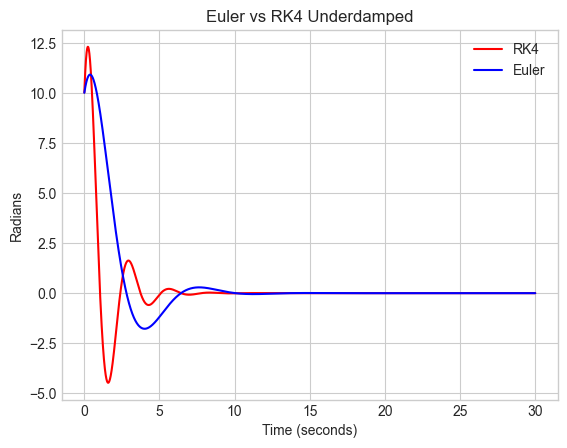

In [75]:
import matplotlib.pyplot as plt

plt.title("Euler vs RK4 Underdamped")
plt.style.use('seaborn-whitegrid')
plt.plot(RKt,RKx,color='red',label='RK4')
plt.plot(EulerT,EulerX,color='blue',label='Euler')
plt.legend(fancybox = True,shadow= True,facecolor='white')

plt.ylabel('Radians')
plt.xlabel('Time (seconds)')
plt.savefig(fname = 'Underdamped',dpi = 300,facecolor = 'white')

# Saving 

In [76]:
import json
x=[]
y=[]
r=10
neededFrames = 24*time
rounds = math.trunc(len(EulerT)/neededFrames)

final_saved = {'FrameCount':neededFrames,'Count':1,'frames':[[]]}
for i in range(neededFrames):
    x=10*math.cos(RKx[i*41])
    y=10*math.sin(RKx[i*41])
    final_saved['frames'][0].append([y,0,-x+string_length])

len(final_saved['frames'][0])

720

In [77]:
with open("undampened.json", "w") as outfile:
    json.dump(final_saved, outfile)